# DAFI's Covariance Module
This document shows the use of DAFI's covariance module *dafi.random_field.covariance*.

In [37]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from dafi import random_field as rf

def plot_mat(mat):
    ncells = mat.shape[0]
    fig, ax = plt.subplots()
    im = ax.matshow(mat)
    ax.xaxis.tick_bottom()
    ax.set_xlabel('Cell Index')
    ax.set_ylabel('Cell Index')
    ax.set_xlim([0, ncells])
    ax.set_ylim([0, ncells])
    ax.set_aspect('equal')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    return fig, ax

## 1D Example

First create the mesh. 

In [2]:
ncells = 100
L = 1.0 
x = np.linspace(0.0, L, ncells)
dx = x[1] - x[0] # equal spacing

### Correlation Structure
Next create the correlation structure. Here we will use a square exponential kernel with a length scale $10\%$ of the domain length. 

In [27]:
l = 0.1*L
corr = rf.covariance.kernel_sqrexp(coords=x, length_scales=l)

We can check that the correlation matrix is a proper correlation matrix, that is:
* Symmetric
* Positive definite
* Diagonal = 1
* Off Diagonal between -1 and 1

In [28]:
passed, message = rf.covariance.check_mat(corr, type='corr')
print(passed)
if not passed:
    print(message)

True


Plot the correlation. Each cell is highly correlated to neighboring cells.

Text(0.5, 1.05, 'Square Exponential Correlation')

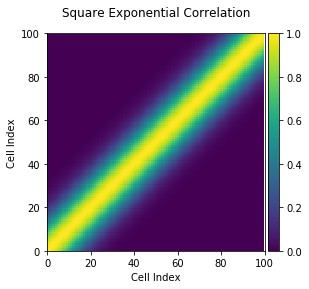

In [39]:
# plot
fig, ax = plot_mat(corr)
ax.set_title('Square Exponential Correlation')

We can also convert the correlation matrix to a sparse matrix (scipy.sparse.csc_matrix). For plotting we can replace the sparse entries with NaN. The *tol* is the value below which entris are set to zero.

Text(0.5, 1.05, 'Square Exponential Correlation (Sparse)')

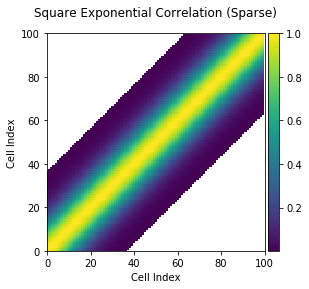

In [40]:
corr_sp = rf.covariance.array_to_sparse(corr, tol=1e-3)
corr_nan = rf.covariance.sparse_to_nan(corr_sp)

# plot
fig, ax = plot_mat(corr_nan)
ax.set_title('Square Exponential Correlation (Sparse)')

### Covariance
To convert get a covariance matrix using the correlation structure already obtained, we need to define the standard deviatoin at each cell. Here we will use a constant standard deviation of $5$. Note that we can generally provide sparse matrices to the functions in the *covariance* module.

The resulting covariance has the same shape as the correlation (since constant standard deviation was used) but is scaled by $5^2$. 

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff117bb13d0>)

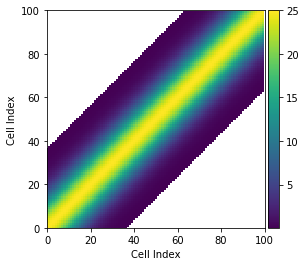

In [44]:
cov = rf.covariance.corr_to_cov(corr_sp, stddev=5)

plot_mat(rf.covariance.sparse_to_nan(cov))

## 2D Example